<a href="https://colab.research.google.com/github/JuanDM0106/Master-research/blob/main/Uncertain_parameter_modeling_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

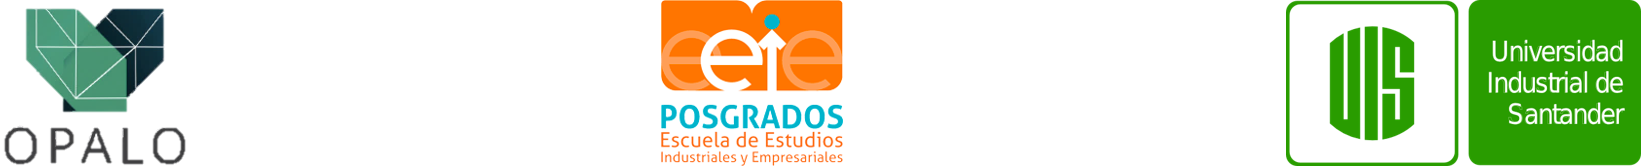

In [ ]:
#@title
Image("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/Logos.png", width=950, height=100)

# **<center> Uncertain parameter modeling notebook**

<p align="justify"> This repository book allows the accessibility of the data processed online and serves as a guideline for future research based on uncertain parameter analysis. Therefore, the objective of this short repository is to develop a brief analysis of weather (mainly precipitation) parameter behavior and to provide some path-based methods and moment matching method for scenario generation. The main parameters analyzed are precipitation, temperature, and humidity collected on a daily basis. The data used are available on the NASA website. <br>

Version: 01 <br>
Date: 30/05/2023

<a href="https://power.larc.nasa.gov/data-access-viewer/"> Click here to check out NASA climatic database.

**First Author: Juan David Márquez González <br>**
**M.Sc.(c) Industrial Engineering <br>**
<br>
**Second Author: Leonardo Hernán Talero Sarmiento <br>**
**M.Sc. Industrial Engineering <br>**
<br>
**Third Author: Henry Lamos Diaz<br>**
**Ph.D. in Physics and Mathematics**<br>
<br>
**Institution**<br>
**Universidad Industrial de Santander**




***
## **Outline**

<p align="justify"> This notebook has the following structure, which looks for a better understanding of time-series modeling as a proper tool to model parameters supporting the construction of optimization models under uncertainty.

<a name="Out"></a>
1.   [Time-series modeling:](#First) theory focused on understanding basic concepts of time-series modeling
2.   [Time-series modeling strategies and Moment Matching related theory:](#Second) main modeling strategies or data behavior representation based on historical data
3.   [Scenario generation and reduction theory:](#Third) brief explanation of scenario generation and scenario reduction techniques
4.   [Data descriptive analysis:](#Fourth) brief descriptive analysis of the data series under study (i.e., precipitation, and others climatic parameters)
5.   [Modeling approach: ](#Fifth) addressing a case study using real data of a specific location in Colombia supporting the understanding of the modeling theory of time-series modeling
6.   [Scenario reduction:](#Sixth) performing a scenario reduction using the models builded before
7.   [Evapotranspiration (ETo) Simulation:](#Seventh) this extra section supports providing a basic data estimation of the Evapotranspiration parameter that will be used later on in data optimization model construction.

***


## **Libraries Requiered**

This section has every R and Python library and documentation used in this notebook. To run R-studio properly in Colab we first need to run the following the next lines regarding, the last version of R is not working currently:


In [ ]:
!pip uninstall rpy2 -y!
!pip install rpy2==3.5.1


Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: -!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# For running R-studio in Colab
%%capture
%load_ext rpy2.ipython

In [ ]:
%%R # Do not show warning mesagess
options(warn=-1)

NULL


In [ ]:
# Installing R libraries
%%capture
%%R
install.packages("ggplot2")   # Library for plotting
install.packages("readxl")    # Library that support .xls read documents
install.packages("WriteXLS")  # Library for saving data into .xlxs extension
install.packages("forecast")  # Library used for imput data
install.packages("urca")      # Library applied for running Unit-Root statistical tests
install.packages("scales")    # Library for scaling data
install.packages("extrafont") # Library that supports plotting
install.packages("grid")      # Library that supports plotting
install.packages("gridExtra") # Library that supports plotting
install.packages("cowplot")   # Library that allows multiples ggplot2 plots
install.packages("WriteXLS")  # Library for saving data into .xlxs extension
install.packages("corrplot")  # Library for plotting correlograms
install.packages("dplyr")     # Library for data manipulation
install.packages("reshape2")  # Library for data strcuture manipulation
install.packages("MASS")      # Library Box-cox transformation
install.packages("lmtest")    # Library to validate the significance of ARIMA models
install.packages("imputeTS")  # Library for data imputation
install.packages("fitdistrplus") # Library for fitting PDF functions
install.packages("neuralnet") # Library for BP-ANN
install.packages("moments")   # Library for moments estimation
install.packages("zoo")       # Library for data aggregation

In [ ]:
# Calling R libraries
%%capture
%%R
library(ggplot2)   # Library for plotting
library(readxl)    # Library that support .xls read documents
library(WriteXLS)  # Library for saving data into .xlxs extension
library(forecast)  # Library used for imput data
library(urca)      # Library applied for running Unit-Root statistical tests
library(scales)    # Library for scaling data
library(extrafont) # Library that supports plotting
library(grid)      # Library that supports plotting
library(gridExtra) # Library that supports plotting
library(cowplot)   # Library that allows multiples ggplot2 plots
library(WriteXLS)  # Library for saving data into .xlxs extension
library(corrplot)  # Library for plotting correlograms
library(dplyr)     # Library for data manipulation
library(reshape2)  # Library for data strcuture manipulation
library(MASS)      # Library Box-cox transformation
library(lmtest)    # Library to validate the significance of ARIMA models
library(imputeTS)  # Library for data imputation
library(fitdistrplus) # Library for fitting PDF functions
library(neuralnet) # Library for BP-ANN
library(moments)   # Library for moments estimation
library(zoo)       # Library for data aggregation

In [ ]:
# Python libraries
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import plotly.express as px

In [ ]:
# Using drive in colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***
<a name="First"></a>
## **Time-series modeling**
This section explians briefly several concepts and characteristics of time-series modeling.<br>

**<p align="justify">
Definition:** A time-series represents the data collectio of a variable gathered sequentially in time (i.e., hours, days, weeks, months, years). Time-series can be multivariate (one dependent variable and more than one independent) or univariate (lag-dependent variable).<p>

**<p align="justify">
What is the relevance of understanding time-series?:** It allows us to understand how the phenomenon behaves based only on the data collected temporarily and make assumptions or decide how to carry out the data analysis using proper and pertinent strategies for data modeling.<p>

 **Time-series analysis goals:**
1.   Descriptive analysis (trends, stationarity, seasonality, randomness, outliers, autocorrelated)
2.   Forecasting
3.   Scenario Generation (Uncertain Analysis path-base methods)

Time-series presents primarily three main sources of variability **components** that analysts deal with:
<br>
<br>
$$ Y(t)= T(t) + Sy(t) + R(t) $$
<br>

**Trend - T(t):** Change in the long-term behavior of the data mean. It can influence an increase or decrease in the data mean. <br>
**Seasonality - S(t):** Certain patterns in the data behavior present always at specific points in time. <br>
**Randomness - R(t):** Also called noise, they represent the random part present in time-series.

The following plot presents these three time-series characteristics.

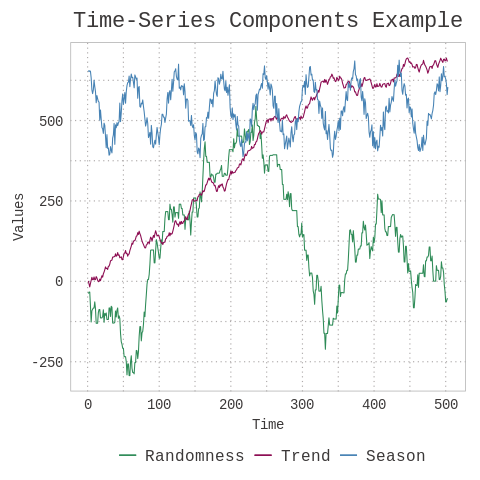

In [ ]:
#@title
Image("/content/drive/MyDrive/Colab Notebooks/Parameter modeling/RTS.png", width=550, height=520)

*Figure 1: Time-series variability sources*

### **Stochastic Processes**

<p align="justify">Time-series usually represent a kind of stochastic processes relating a collection or family of ordered continuous or discrete random variables (RV) dependent on time (Gujarati & Porter, 2010). Every random variable contained in the process typically presents a unique probability distribution. A RV represents a numerical value that is impossible to know in advance and can only be analyzed once it has occurred. The previous generates difficulties for decision-makers or analysts, considering that a specific parameter, being precisely unknown, generates highly risky decision-making and therefore reductions in benefits.<p>

Stochastic processes present two groups according to probabilistic properties, stationary and non-stationary processes.

**<p align="justify">1.   Non-Stationary stochastic process:** A stochastic process is non-stationary if the probability distribution associated with the RVs changes in the period analyzed.<p>

**<p align="justify">2.   Stationary stochastic process:** On the contrary, a stochastic process is stationary where some (or all) probability distribution moments are constant at all temporal positions. There are two main types of stocastic stationary processes related to the assumptions of moments invariance:
<ul>
<li> <p align="justify"> Strict/Strictly stochastic stationary processes: These are processes where all the probability distribution moments are constant or invariant in time. However, guaranteeing invariance at all moments is usually complex. Therefore, weak stationary processes appears as alternative for modeling purposes.<p> </li>

<li> <p align="justify"> Wide-sense also called weak stationary process is relevant in modeling time-series regarding how complex is to define/set all random variable moments in time. Therefore, guaranteeing a wide-sense stationary stochastic process enable to reproduce some variables beahavior thorugh time-series modeling strategies. These are processes that meet the following characteristics: mean and variance remains invariant in time, and the covariance only relies on the random variables realizations.
$$ E(Y_t)=\mu $$
$$ Var(Y_t)=\sigma^{2} $$
$$ Cov(Y_t)=E[Y_t-\mu)(Y_{t+k}-\mu)]=\gamma_t $$ <br>
<p align="justify">

### **Random walk processes**

<p align="justify"> They are a type of stochastic process where the variable present value only depends on the previous value and a random variable. In time series, we face three main RW processes, RW pure, RW with drift, and RW with drift and trend. These processes present particular behaviors in the series, which can be visualized through line plots and verified with statistical tests. If a historical series does not demonstrate these behaviors, we would be dealing with stationary series. On contrary, if the time-series follow these kind of processes we will be dealing with RW processes, then data must be adressed to determine presence of unit-root and establish a proper strategy to work with a stationary process. <p>
RW pure:  $${Y}_{t}={Y}_{t-1}+u_{t}$$
RW with drift: $${Y}_{t}=\beta_{1}+\delta{Y}_{t-1}+u_{t}$$
RW with drift and trend and $${Y}_{t}=\beta_{1}+\beta_{2}{t}+\delta{Y}_{t-1}+u_{t}$$<br>

### **Stationary Analysis**

Hence, analyzing stationarity in series let us know if the data requires some kind of data transformation or integration to transform the series into a stationary process.

#### **Autocorrelation Function Plots**

<p align="justify">Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are statistical indicators that provides the statistical correlation between variables regarding time. ACF enables us to identify if the serie presents autocorrelations, which means the serie has memory or depends on lags. In contrast, PACF shows the correlation between two variables separated $k$ periods without considering the effect of the lags or intervals between them.<p>

#### **Unit-root tests**

<p align="justify">These tests (unit-roots) evaluate the presence of unit roots in the series (random walk processes). In the unit-root tests, the following hypotheses are contrasted:<p>

**Ho**: *the existence of unit-root in the series*<br>
**Ha**: *non-existence of unit-root* <br>

###### **Augmented Dickey-Fuller Test**
Augmented Dickey- Fuller (1979), developed a statistical test for evaluating the unit-root existence process. The test comprises three differents parts according to certain series characteristics.
<br>

###### ***Unit-root test with drift and trend***
<br>

$${Y}_{t}=\beta_{1}+\beta_{2}{t}+\delta{Y}_{t-1}+u_{t}$$<br>

<p align="justify">The first test consists of determining if the data present a unit-root process with drift and trend (as observed in the previous equation), where the value $\beta_{1}$ represents the intercept or derivative of the process, $\beta_{2}$ the time trend of the process, $\delta$ the root of the process, ${Y}_{t-1}$ the lagged variable, $u$ an error value or white noise (which is normally distributed with $\mu = 0$ and $\sigma^{2} = 1$, and its no correlated) associated with the model and ${t}$ is the time measured chronologically.<p>

###### ***Unit-root test with drift and without trend***

$${Y}_{t}=\beta_{1}+\delta{Y}_{t-1}+u_{t}$$

<p align="justify"> The second test consists of checking if the data set presents a unit-root process with drift and without trend (as observed in the previous equation), where the value $\beta_{1}$ represents the intercept or derivative of the process, $\delta$ represents the root of the process,  ${Y}_{t-1}$ the lagged variable, $u$ an error or white noise value associated with the model and ${t}$ is the time measured chronologically. <p>

###### ***Unit-root test without drift and without trend***

 $${Y}_{t}={Y}_{t-1}+u_{t}$$

<p align="justify">The third test consists of verifying if the data presents a unit-root process without drift and without trend (as observed in the previous equation), where the value $\delta$ represents the root of the process, ${Y}_{t-1}$ the lagged variable, $u$ an error value according to white noise with the model and ${t}$ is the time measured chronologically.

It should be noted that the second and third processes are adjustments to the first model or are derived from it, where the second process does not present trend = 0 and the third one does not present neither drift = 0 nor trend = 0.<p>

##### **Phillips-Perron Stationary test**

<p align="justify">Phillips-Perron (1986), developed a statistical test applied to time-series unit-roots identification. The test performs the same contrast as the ADF test but using non-parametric methods, which avoids the use of correlations in the residuals. The test allows identifying ramdon walk processes in time-series.<p>

##### **Ljung-Box test**

<p align="justify"> Ljung-Box (1978), developed a test that evaluates the existence of autocorrelation of a data set (e.g., residuals of a statistical model) by checking the randomness of lags. It is a portmanteau test since the null hypothesis is well specified, and the alternative is vague. The hypothesis evaluates:<p>

**Ho**: Residuals distributed independently<br>
**Ha**: Residuals not independently distributed

***
<a name="Second"></a>
## **Time-series modeling strategies**

### **ARIMA**

<p align="justify"> Meeting this assumption (wide-sense stationary), we can fit autoregressive models to represent the data behavior. In the autoregressive models type, the most used are the Autoregressive Integrated Moving Average (ARIMA) models. These models cover the analysis of a time series probabilistic properties using three main components:<p>

**<p align="justify"> AR (Autoregressive)** - A model representation of lag dependency relationship (autocorrelation).
$$ y_{t}=\varphi_{0}+\varphi_{1} y_{t-1}+\varphi_{2} y_{t-2} +...+\varphi_{n} y_{t-n}+u_{t}$$

where, $y_{t}$ is the variable in time $t$, while $\varphi_{0}, \varphi_{1}, \varphi_{n}$, and $y_{t-1}, y_{t-2}, y_{t-n}$ represent regression parameters, and the variable lagged values respectively. $u_{t}$ is the error or random variable.

**<p align="justify"> I (Integration)** - The differentiation factor of the series makes it stationary. This process relates to how many times we must pull out the series mean. This process involves extracting the mean from the series which allows turning the series into a stochastic stationary process.

**<p align="justify"> MA (Moving Average)** - A model representation of observations dependency on lagged residual errors. <br>
$$ y_{t}=\mu+\beta_{0} u_{t}+\beta_{1} u_{t-1} +...+\beta_{n} u_{t-n}$$

where, $y_{t}$ is the variable in time $t$, $\mu, \beta_{0}, \beta_{1}$, and $\beta_{n}$ are regresion parameters and $u_{t}, u_{t-1}, u_{t-n}$ are the model errors/white noise random variables each time $t$.

**<p align="justify"> ARIMA ($p$, $d$, $q$)** - models have a standard notation where the parameter $p$ represents the significant lags of the series, $d$ the degree of differencing, and $q$ the order of the model significant residuals. The following expression represents an ARIMA model with $n$ significance lagged values and white noise random variables.
$$ y_{t}=\theta+\varphi_{1} y_{t-1}+\varphi_{2} y_{t-2} +\beta_{0} u_{t}+\beta_{1} u_{t-1} +...+\varphi_{n} y_{t-n}+\beta_{n} u_{t-n}$$

where $\theta$ is a constant.
<p align="justify"> G. P. E. Box and G. M. Jenkins (1976), proposed a methodology to fit ARIMA models. The methodology includes 4-step to fit and validate ARIMA models evaluating white noise behavior in residuals $IIDN(0, \sigma^{2})$. The methodology is the following: <p>

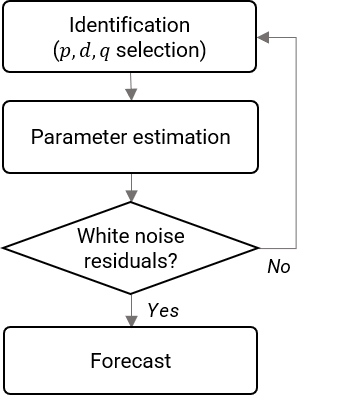

*Figure 2: Box-Jenkins (BJ) mehodology for building ARIMA models. Adapted from Box, G. E. P., & Jenkins, G. M. (1976)*

### **Backpropagtion ANN**

<p align="justify">  An Artificial Neural Network (ANN) is an information processing paradigm based on the behavior of the human being (Yasrebi & Emami, 2008). The model comprises a large network of neurons (nodes) interconnected to generate results. A generic ANN has a three-layer structure. The first layer contains the input variables or lagged values ​​of the time series. The second or hidden layer includes the internal processing units where a function applies weights to the inputs and activates the neuron depending on the output of the activation function (see activation functions). The output layer contains the results corresponding to the variable to be forecast; these depend on the number of predicted periods and the forecasting methodology. <p>

<p align="justify"> Backpropagation ANN are neural networks with multilayer architecture, which have a forward information flow, and are based on strategies such as gradient descent or adaptive moment estimation to update and generate the network training through error backpropagation (i.e. deviation from the expected value), allowing the correction and nodes weights adjustment in all layers. In this kind of ANN, the neural network learns from errors in every iteration or epoch, once we obtain the first error, it is communicated back to previous layers and allows adjusting weights to provide a better ANN that answer to data behavior.

The BP-ANN has the following process:

1. <p align="justify"> Forward step: It starts with the input vector (first layer), which relates every independent variable that posses some correlation with the output.
2. <p align="justify"> Weigths calculation: data from the first layer flows thorugh every node and they get activated regarding some activation function as follows.

 $$a=f(z)=f\left(\sum_{i = 1}^{N}w_{i}x_{i}+b\right)$$

 <p align="justify"> where, $w_{i}$ are the random weigths in the first iteration, $x_{i}$ are the inputs, $b$ the node bias and the output ($a$) is given by using some activation functions like, logistic sigmoide, hyperbolic or the linear funtion.
3. <p align="justify"> Compute loss: After runing through the whole network we obtain the error in the final layer using some loss funtions like Mean Squered Error (MSE) which is:

$$L=\frac{1}{2}(y-t)^2$$

4. <p align="justify"> Backward propagation: then we calculates the gradient of the loss funtion considering that in the direction of the gradient we minimizes the loss funtion:
$$\delta=\frac{\partial L}{\partial a }$$
Then we determine the gradient loss as follows:
$$\delta_{z}=\delta . f'(z)$$
where $f'(z)$ is the first derivate of the activation function with respect to $z$. Then the gradients with respect to weights $(w_{i})$ and bias $(b)$ of a given neuron follows:
$$\frac{\partial L}{\partial w_{i} }=\delta_{z} . x_{i}$$
$$\frac{\partial L}{\partial b }=\delta_{z}$$

5. <p align="justify">  Weights and bias update: finally the first iteration weights and biases are corrected as follows:
$$w_{i}=w_{i}-\alpha \frac{\partial L}{\partial w_{i} }$$
$$b=b-\alpha \frac{\partial L}{\partial b}$$

## **Moment Matching**

<p align="justify"> The moment matching is a statistical technique that allows to estimate the parameters of a Probability Distribution Function (PDF) based on sample data (e.g. time-series data). It relies on the estimation of the data moments. The procedure follows the below steps:

1. Choose a PDF.
2. <p align="justify">  Define the moments of the PDF. Usually the procedure seeks to stimate the first four moments (mean, variance, skewness, and kurtosis).
3. Estimates the moments of the given sample.
4. <p align="justify"> Equate the data moments with the population moments and determine the unknowing parameters.
5. Check the goodness of the moments fit to the data using plots comparisons or probability plots.
6. <p align="justify"> Check if the process allows a satisfactory estimation of moments. If calculating the parameters once again doesn't provide a proper fit, try another type of PDF.
***

<a name="Third"></a>
## **Scenario generation and reduction theory**

<p align="justify"> Considering that stochastic optimization models with multiple related scenarios usually represent large-scale problems or high complexity models, it is pertinent to use strategies that provide key scenarios. According to Conejo et al. (2010), there are four main strategies that support scenario generation:

1. <p align="justify">Path-based methods: which generate a scenario fan through multiple kinds of econometric or time-series models.
2. <p align="justify">Moment matching: this method fit a PDF to sample data estimating the parameters that allows representing better the data behavior (Xu et al., 2012).
3. <p align="justify">Internal sampling: this method use some random observations of the sample as scenarios (Høyland & Wallace, 2001).
4. <p align="justify">Scenario reduction: it starts with a scenario generated fan and allows stablishing a smaller fan with the most common scenarios providing a scenario fan that has the closest PDF to the original one (Dupačová & Kozmík, 2017).

<p align="justify"> The first and fourth are related strategies in this notebook, since we first build path-base models to represent data behavior (ARIMA and BP-ANN) and those scenarios are then running through a reduction strategy that provides a proper fan of scenarios. There are two main heuristics to reduce the scenario fan, forward selection, and backward reduction. The first one produces a smaller fan evaluating every scenario according to relevance, diversity, and representativeness criteria, providing the scenarios that better fit real data and problem uncertainty. This method is usually applied to fans with fewer than 50 scenarios. The second strategy is widely used when there are a lot of scenarios and provides a good scenario fan that fits the problem uncertainty based on the similarity between scenarios. We follows the research of J. Dupačová et al. (2003) to reproduce a better fan based on the Wasserstein metric (Kantorovich–Rubinstein metric).

#### **Scenario reduction: Wasserstein metric**

<p align="justify">This procedure involves a scenario fan reduction using the Wasserstein metric which is a distance function that provides the similarity between sets or probability distributions that comes from the same metric space. Then, the procedure provides the most relevant scenario fan, while dropping the scenarios less likely. This metric states the following:

1. <p align="justify">There are two probability distribution functions $P$ with a set of scenarios $w$ $\in \Omega$ and $Q$ with a set of scenarios $w'$ $\in \Omega_{s}$
2. <p align="justify">These sets of scenarios have their own ocurrence probability $\pi_{w}$ and $\tau_{w'}$.
3. <p align="justify">The reduction relies on identifying the pair of scenarios that can be merged preserving the sample distribution and returning a representative fan with less loss in the original PDF.

The following expressions shows the metric estimation procedure. Both equations represent the same regarding the study only deals with uncertainties in the right-hand side constraints:

$$D_{k}(P,Q)=\begin{array}{cc}min\\n\end{array}\left(\begin{array}{cccc}\sum_{w\in\Omega, w'\in\Omega_{s}}v(w, w')n(w, w'):\\ n(w, w')\geq0,	\forall w\in\Omega,\forall w'\in\Omega_{s}, \\\sum_{w'\in\Omega_{s}}n(w, w')=\pi_{w}, \forall w\in\Omega \\ \sum_{w\in\Omega}n(w, w')=\tau_{w'}, \forall w'\in\Omega_{s} \end{array}\right)$$
<br>
$$D_{k}(P,Q)=\sum_{w\in\Omega \ w}\pi_{w}\begin{array}{cc}min\\w'\in\Omega_{s}\end{array}v(w,w')$$

The following is the step by step to apply the scenario reduction:
1. Load a database containing the scenarios.
2. Center the generated scenarios, using the mean and standard deviation. (This generates a table with the normalized scenarios).
3. To calculate the distances between the normalized scenarios using the Euclidean distance.
4. To estimates the minimum distance between scenarios (i.e., determine the minimum distance between one scenario and the rest).
5. To estimates the cost by multiplying the minimum euclidean distances $(D)$ and the probability value $(\pi)$.
6. To estimates the minimum sum of distances between scenarios, that is, all the distances between one scenario and the rest of them. Then, compare that value with the sum of the other scenarios, and the smallest is the $D_{k}$ or $E_{max}$.
7. To calculates the relative tolerance as:
 $$Tolrel=\frac{min(cost)}{E_{max}}$$
8. To calculates the Expected Tolerance as
$$T=\frac{Tol}{a^t}$$
where, $T$ is the expected tolerance, $Tol$ and $a$ are tolerance fixed parameters (provided by the researhcer) for reducing scenarios, and $t$ represents the time horizon.
9. If $Tolrel< T$, the two closest scenarios are joined, leaving one of the two scenarios (the one farthest from the other scenarios), then adds the probabilities and assigns it to the remaining scenario. Delete the other scenario and repeat steps 3-7.
10. If $Tolrel> T$, merged the two closest scenarios (step 9), then deletes the last timeline in the scenario matrix and repeat steps 3-7.
11. The process stops when obtaining the desired scenarios.
***

<a name="Fourth"></a>
## **Data descriptive analysis**

<p align="justify"> This section aims to provide a descriptive analysis of the climatic data, processing the historical series with the objective of using them later in the autoregressive building models process, the Probability Distribution Function (PDF) fit, the generation of the scenarios fan, and its subsequent reduction. This section follows the below structure:

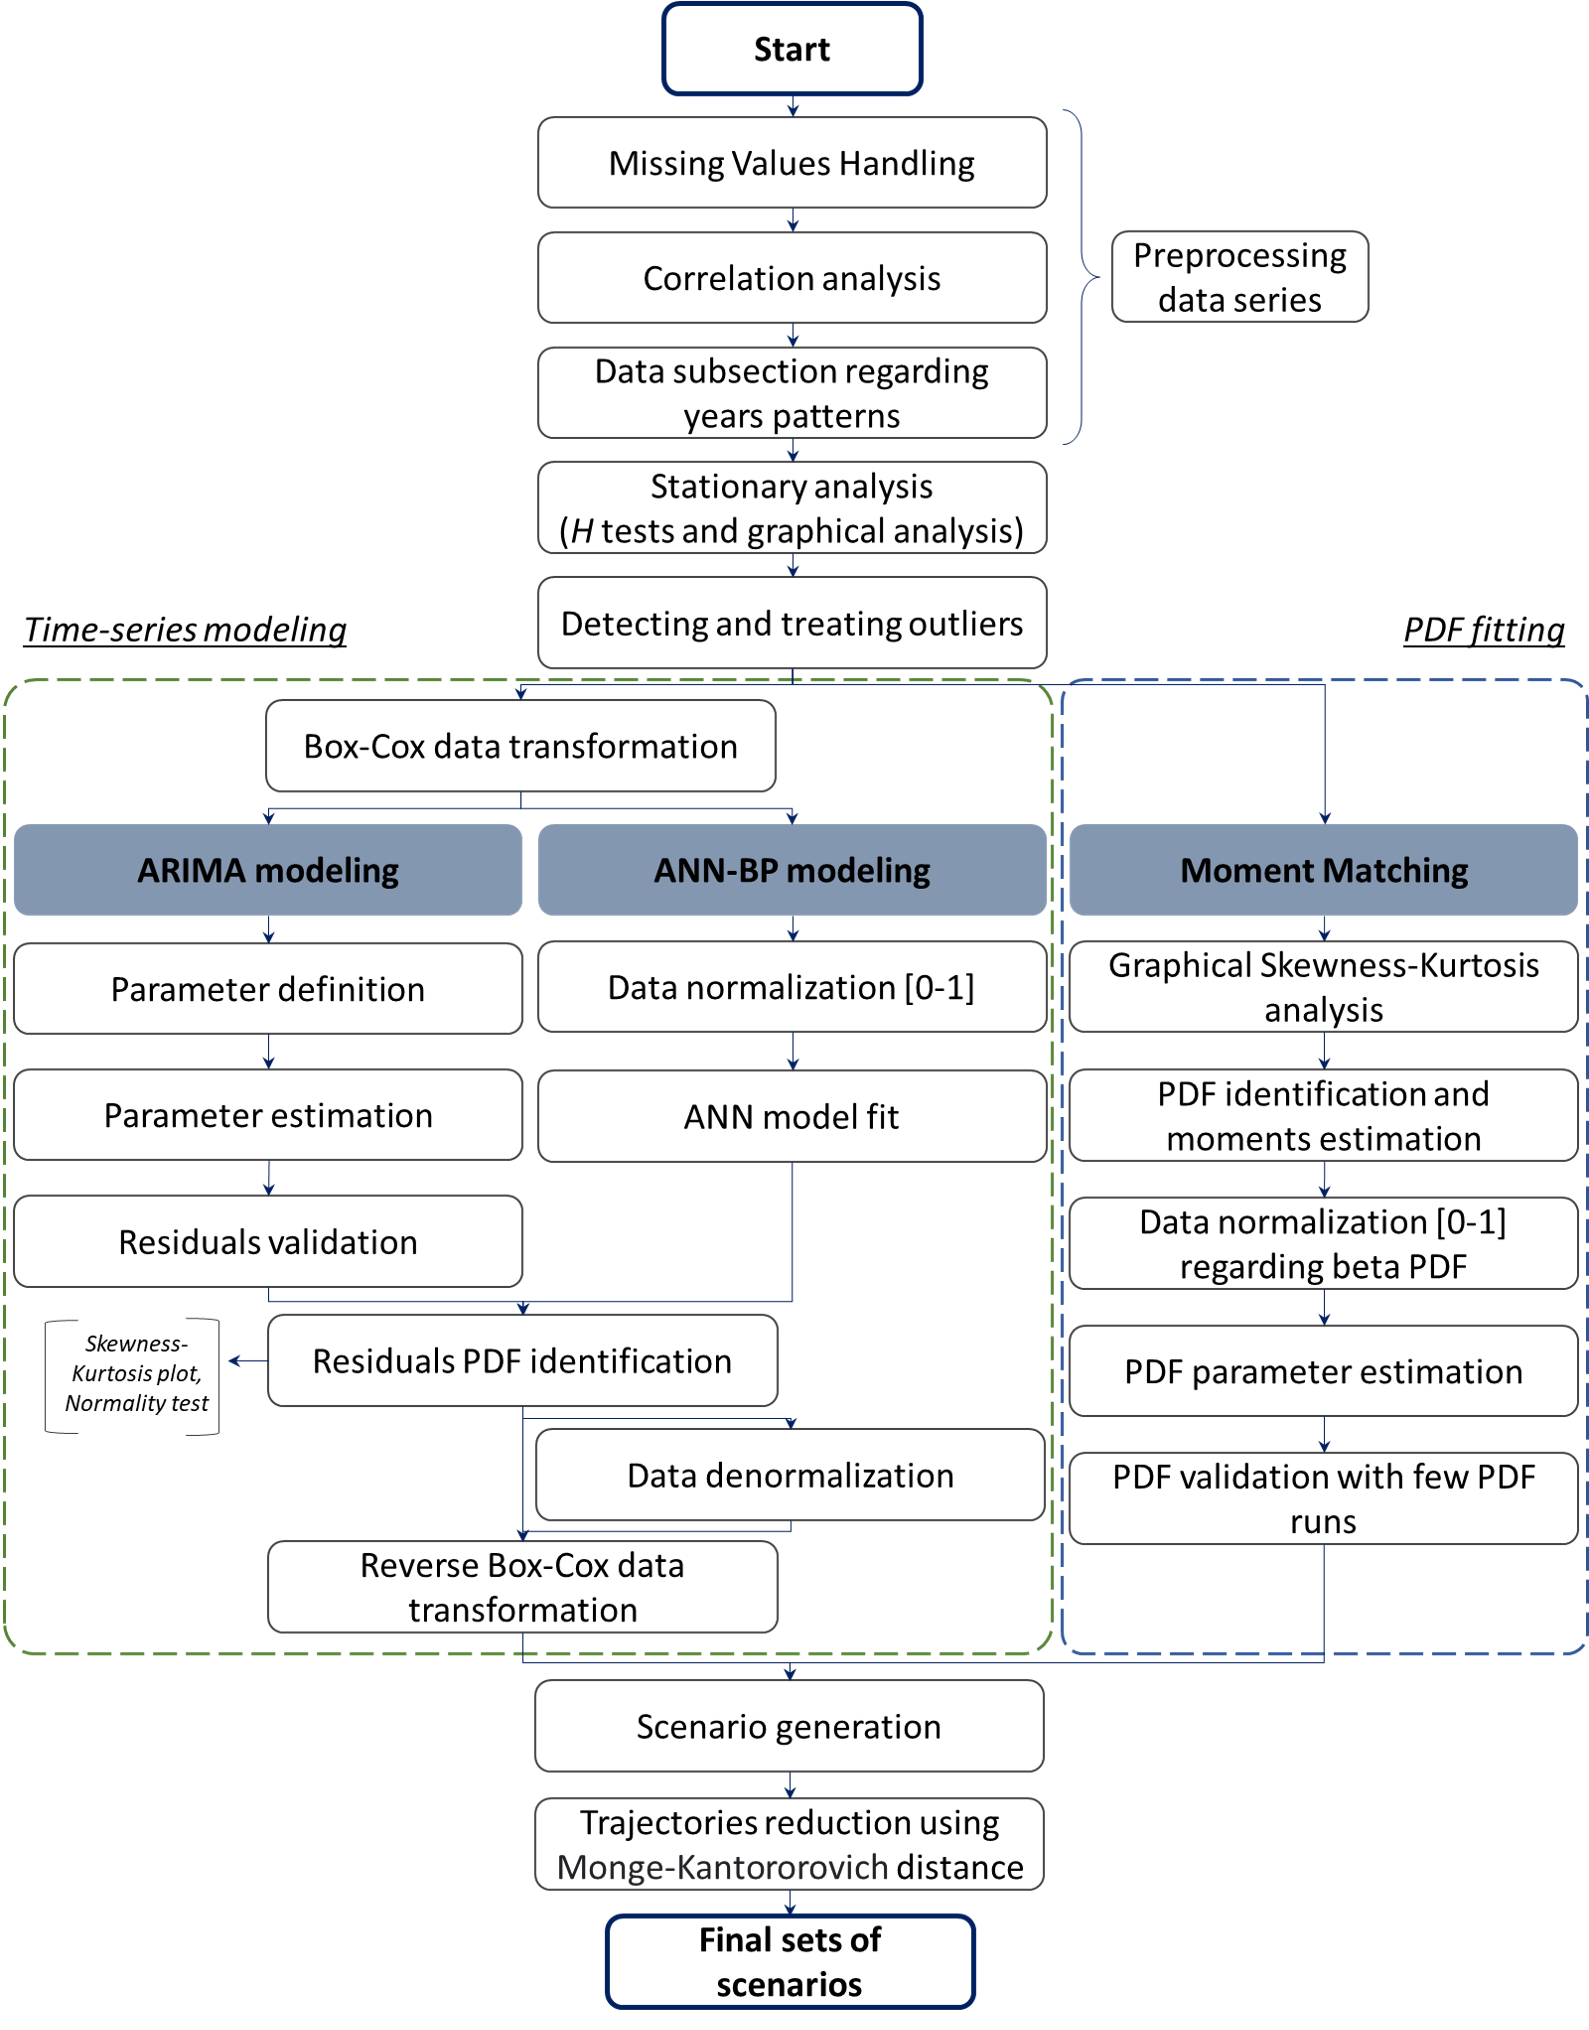

In [ ]:
#@title
Image("/content/drive/MyDrive/Colab Notebooks/Parameter modeling/Scenario generation and reduction methodology.png", width=550, height=720)

*Figure 2: Scenario generation and reduction methodology.*

In [ ]:
#@title ##### Elegant Theme for ggplot2 plotting purposes
# Customized ggplot data plotting
# By pmoracho from GitHub (https://pmoracho.github.io/blog/2019/03/10/sample-ggplot-plots/)
%%R
theme_elegante <- function(base_size = 16,
                           base_family = "Raleway")
{
  color.background = "#FFFFFF" # Chart Background
  color.grid.major = "#AFABAB" # Chart Gridlines
  color.axis.text = "#3B3838"
  color.axis.title = "#3B3838"
  color.title = "#3B3838"
  color.subtitle = "#3B3838"
  strip.background.color = '#9999CC'

  ret <-theme_bw(base_size=base_size) +

    # Set the entire chart region to a light gray color
    theme(panel.background=element_rect(fill=color.background, color=color.background)) +
    theme(plot.background=element_rect(fill=color.background, color=color.background)) +
    theme(panel.border=element_rect(color=color.background)) +

    # Format the grid
    theme(panel.grid.major=element_line(color=color.grid.major,size=.55, linetype="dotted")) +
    theme(panel.grid.minor=element_line(color=color.grid.major,size=.55, linetype="dotted")) +
    theme(axis.ticks=element_blank()) +

    # Format the legend, but hide by default
    theme(legend.position="none") +
    theme(legend.background = element_rect(fill=color.background)) +
    theme(legend.text = element_text(size=base_size-3,color=color.axis.title, family = base_family)) +

    theme(strip.text.x = element_text(size=base_size,color=color.background, family = base_family)) +
    theme(strip.text.y = element_text(size=base_size,color=color.background, family = base_family)) +
    #theme(strip.background = element_rect(fill=strip.background.color, linetype="blank")) +
    theme(strip.background = element_rect(fill = "grey70", colour = NA)) +
    theme(panel.border= element_rect(fill = NA, colour = "grey70", size = rel(1)))+
    #Set title and axis labels, and format these and tick marks
    theme(plot.title=element_text(color=color.title,
                                  size=22,
                                  vjust=1.5,
                                  family=base_family,
                                  hjust = 0.5)) +

    theme(plot.subtitle=element_text(color=color.subtitle, size=base_size-1, family = base_family,  hjust = .5))  +

    theme(axis.text.x=element_text(size=base_size-2,color=color.axis.text, family = base_family)) +
    theme(axis.text.y=element_text(size=base_size-2,color=color.axis.text, family = base_family)) +
    theme(text=element_text(size=base_size-2, color=color.axis.text, family = base_family)) +

    theme(axis.title.x=element_text(size=base_size-2,color=color.axis.title, vjust=0, family = base_family)) +
    theme(axis.title.y=element_text(size=base_size-2,color=color.axis.title, vjust=1.25, family = base_family)) +
    theme(plot.caption=element_text(size=base_size-2,color=color.axis.title, vjust=1.25, family = base_family)) +

    # Legend
    theme(legend.text=element_text(size=base_size,color=color.axis.text, family = base_family)) +
    theme(legend.title=element_text(size=base_size,color=color.axis.text, family = base_family)) +
    theme(legend.key=element_rect(colour = color.background, fill = color.background)) +
    theme(legend.position="bottom",
          legend.box = "horizontal",
          legend.title = element_blank(),
          legend.key.width = unit(.75, "cm"),
          legend.key.height = unit(.75, "cm"),
          legend.spacing.x = unit(.25, 'cm'),
          legend.spacing.y = unit(.25, 'cm'),
          legend.margin = margin(t=0, r=0, b=0, l=0, unit="cm")) +

    # Plot margins
    theme(plot.margin = unit(c(.5, .5, .5, .5), "cm"))

  ret
}

In [ ]:
#@title ##### Elegant ACF and PACF plots
# Customized corrplot
# By Liu, Kevin from GitHub (https://rh8liuqy.github.io/ACF_PACF_by_ggplot2.html)
%%R
ggplot.corr <- function(data, lag.max = 24, ci = 0.95, large.sample.size = TRUE, horizontal = TRUE,...)

{

  require(ggplot2)
  require(dplyr)
  require(cowplot)

  if(horizontal == TRUE) {numofrow <- 1} else {numofrow <- 2}

  list.acf <- acf(data, lag.max = lag.max, type = "correlation", plot = FALSE)
  N <- as.numeric(list.acf$n.used)
  df1 <- data.frame(lag = list.acf$lag, acf = list.acf$acf)
  df1$lag.acf <- dplyr::lag(df1$acf, default = 0)
  df1$lag.acf[2] <- 0
  df1$lag.acf.cumsum <- cumsum((df1$lag.acf)^2)
  df1$acfstd <- sqrt(1/N * (1 + 2 * df1$lag.acf.cumsum))
  df1$acfstd[1] <- 0
  df1 <- dplyr::select(df1, lag, acf, acfstd)

  list.pacf <- acf(data, lag.max = lag.max, type = "partial", plot = FALSE)
  df2 <- data.frame(lag = list.pacf$lag,pacf = list.pacf$acf)
  df2$pacfstd <- sqrt(1/N)

  if(large.sample.size == TRUE) {
    plot.acf <- ggplot(data = df1, aes(x = lag, y = acf)) +
      geom_area(aes(x = lag, y = qnorm((1+ci)/2)*acfstd), fill = "#B9CFE7") +
      geom_area(aes(x = lag, y = -qnorm((1+ci)/2)*acfstd), fill = "#B9CFE7") +
      geom_col(fill = "#4373B6", width = 0.7) +
      scale_x_continuous(breaks = seq(0,max(df1$lag),6)) +
      scale_y_continuous(name = element_blank(),
                         limits = c(min(df1$acf,df2$pacf),1)) +
      ggtitle("ACF") +
      theme_bw()

    plot.pacf <- ggplot(data = df2, aes(x = lag, y = pacf)) +
      geom_area(aes(x = lag, y = qnorm((1+ci)/2)*pacfstd), fill = "#B9CFE7") +
      geom_area(aes(x = lag, y = -qnorm((1+ci)/2)*pacfstd), fill = "#B9CFE7") +
      geom_col(fill = "#4373B6", width = 0.7) +
      scale_x_continuous(breaks = seq(0,max(df2$lag, na.rm = TRUE),6)) +
      scale_y_continuous(name = element_blank(),
                         limits = c(min(df1$acf,df2$pacf),1)) +
      ggtitle("PACF") +
      theme_bw()
  }
  else {
    plot.acf <- ggplot(data = df1, aes( x = lag, y = acf)) +
      geom_col(fill = "#4373B6", width = 0.7) +
      geom_hline(yintercept = qnorm((1+ci)/2)/sqrt(N),
                 colour = "sandybrown",
                 linetype = "dashed") +
      geom_hline(yintercept = - qnorm((1+ci)/2)/sqrt(N),
                 colour = "sandybrown",
                 linetype = "dashed") +
      scale_x_continuous(breaks = seq(0,max(df1$lag),6)) +
      scale_y_continuous(name = element_blank(),
                         limits = c(min(df1$acf,df2$pacf),1)) +
      ggtitle("ACF") +
      theme_bw()

    plot.pacf <- ggplot(data = df2, aes(x = lag, y = pacf)) +
      geom_col(fill = "#4373B6", width = 0.7) +
      geom_hline(yintercept = qnorm((1+ci)/2)/sqrt(N),
                 colour = "sandybrown",
                 linetype = "dashed") +
      geom_hline(yintercept = - qnorm((1+ci)/2)/sqrt(N),
                 colour = "sandybrown",
                 linetype = "dashed") +
      scale_x_continuous(breaks = seq(0,max(df2$lag, na.rm = TRUE),6)) +
      scale_y_continuous(name = element_blank(),
                         limits = c(min(df1$acf,df2$pacf),1)) +
      ggtitle("PACF") +
      theme_bw()
  }
  cowplot::plot_grid(plot.acf, plot.pacf, nrow = numofrow)
}


In [ ]:
# Loading Dataset
%%R
Data=read_excel("/content/drive/MyDrive/Materias Maestria/Project/Sections/Appendix/Database/NASA POWER 1981-2020.xlsx", sheet = "DATA")

<p align="justify"> Lets start by plotting every climatic factor to see unusual behaviors in data.

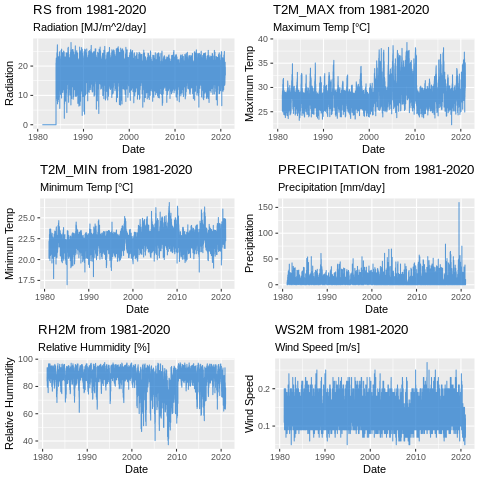

In [ ]:
%%R
colums<- c("RS", "T2M_MAX", "T2M_MIN","PRECIPITATION", "RH2M", "WS2M")
metricunits<-c("[MJ/m^2/day]", "[°C]", "[°C]", "[mm/day]", "[%]", "[m/s]")
parameters<- c("Radiation", "Maximum Temp", "Minimum Temp", "Precipitation", "Relative Hummidity", "Wind Speed")
j<-1
Plot <- list()

for(i in colums){

  Plot[[i]] <- ggplot(Data,  aes_string(x="DATE", y=i, color=factor(Data$YEAR)))+geom_line(alpha = 0.7, color ="#1874CD")+
    labs(title=paste(i,"from 1981-2020"), subtitle=paste(parameters[j], metricunits[j]), y=parameters[j], x="Date")
  j<-j+1
}
do.call(grid.arrange, Plot)

<p align="justify"> Nevertheless, we can see that there are some zero values in the radiation scatter plot, which means the same as NA values considering there is no possibility of no radiation (or 0 radiation) in a specific day. Therefore, we reduce the dataset regarding only the time span where all radiation values exist by following.

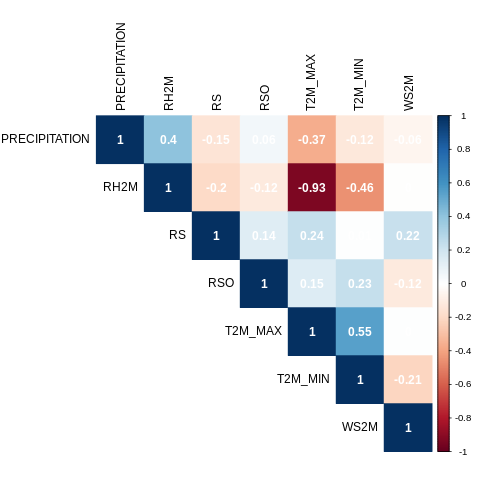

In [ ]:
%%R
Data1<-Data[!apply(Data[,5] == 0, 1, all), ] # To subset data according to "0" in Radiation parameter

# Corrplot de los parametros climaticos
corrplot(cor(Data1[,c(5:11)]),
         method = "color",
         type = "upper",
         diag = TRUE,
         tl.col = "gray1",
         bg = "white",
         addCoef.col ='white',
         title = "",
         order = 'alphabet',
         col = NULL)       # Paleta de colores

<p align="justify"> The corplot shows no correlation behavior between precipitation and other climatic parameters, since the only one with a "high" correlation is RH with only 0.4, but it is low still for our study. Therefore, we can establish that the precipitation parameter may be modeled as an univariate time-series. Then, an univariate descriptive analysis is carry out to see how parameter is distributed

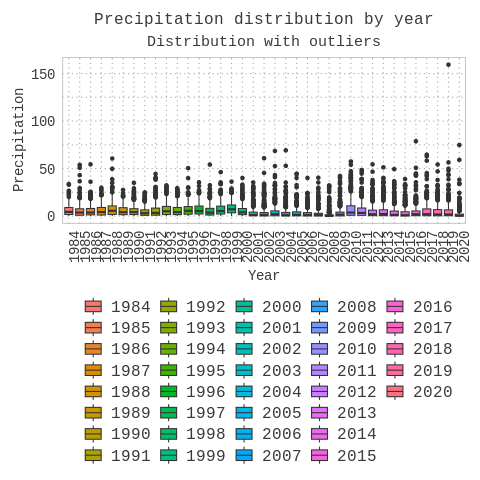

In [ ]:
%%R
ggplot(Data1, aes(x=factor(YEAR), y=PRECIPITATION, fill=factor(YEAR))) +
  geom_boxplot()+ theme_elegante()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  scale_y_continuous(limits = quantile(Data$PRECIPITATION, c(0, 1)))+
  labs(title="Precipitation distribution by year", subtitle="Distribution with outliers",
       y="Precipitation", x="Year")+theme(plot.title=element_text(size=16))

<p align="justify"> We can observe that precipitation has several outliers through whole years. For a better undestanding we print a new boxplot dropping outliers. In this plot we can see there are around four different period behaviors in data, first (1984-2000) second (2001-2009), third (2010-2015), and fourth (2016-2020). Third and fourth behavior seems to have almost the same behavior, regarding such situation, only the fourth period is considered for modeling the precipitation parameter.

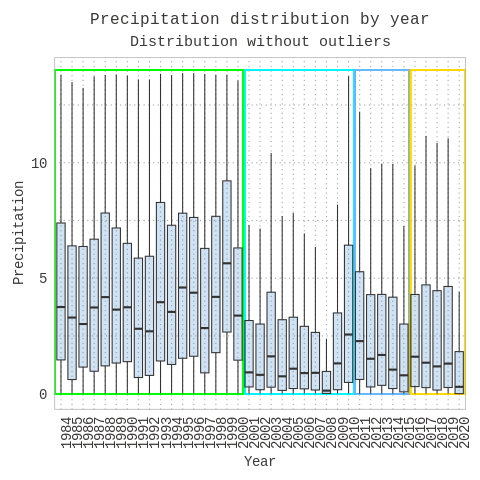

In [ ]:
%%R
ggplot(Data1, aes(x=factor(YEAR), y=PRECIPITATION))+
  geom_rect(xmin = as.numeric(0.5), xmax = as.numeric(17.5),   ymin = 0, ymax = 14, color = "green", fill=NA) +
  geom_rect(xmin = as.numeric(17.6), xmax = as.numeric(27.5),   ymin = 0, ymax = 14, color = "#00F5FF", fill=NA) +
  geom_rect(xmin = as.numeric(27.6), xmax = as.numeric(32.5),   ymin = 0, ymax = 14, color = "steelblue1", fill=NA) +
  geom_rect(xmin = as.numeric(32.6), xmax = as.numeric(37.5),   ymin = 0, ymax = 14, color = "#FFD700", fill=NA) +
  geom_boxplot(outlier.shape = NA, , fill="#1874CD", alpha=0.2)+ theme_elegante()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  scale_y_continuous(limits = quantile(Data$PRECIPITATION, c(0, 0.9)))+
  labs(title="Precipitation distribution by year", subtitle="Distribution without outliers",
       y="Precipitation", x="Year")+theme(plot.title=element_text(size=16))

In [ ]:
# Final dataset to work with
%%R
Data1<-data.frame(subset(Data1,YEAR>=2016))

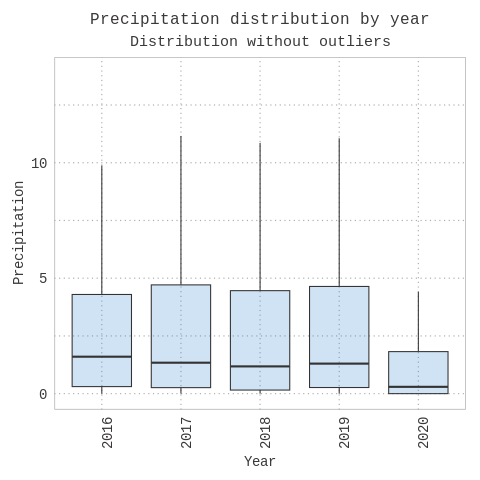

In [ ]:
%%R
ggplot(Data1, aes(x=factor(YEAR), y=PRECIPITATION))+
  geom_boxplot(outlier.shape = NA, fill="#1874CD", alpha=0.2)+ theme_elegante()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  scale_y_continuous(limits = quantile(Data$PRECIPITATION, c(0, 0.9)))+
  labs(title="Precipitation distribution by year", subtitle="Distribution without outliers",
       y="Precipitation", x="Year")+theme(plot.title=element_text(size=16))

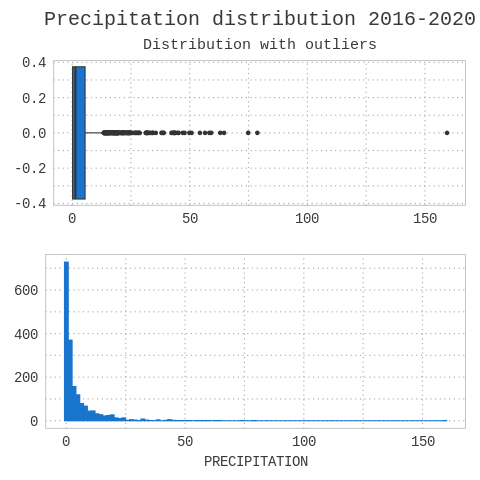

In [ ]:
# Data visualization
%%R
ggplot(Data1, aes(x=DATE, y=PRECIPITATION)) + geom_line(alpha = 0.7, color ="#1874CD")+
  theme_elegante()+labs(title="Precipitation from 2016-2020", subtitle="Precipitation [mm/day]", y="Precipitation")


bp<-ggplot(Data1, aes(x=PRECIPITATION)) + geom_boxplot(fill="#1874CD")+theme_elegante()+
  labs(title="Precipitation distribution 2016-2020", subtitle="Distribution with outliers")+
  theme(axis.title.x=element_blank(), plot.title = element_text(size=20))

h<-ggplot(Data1, aes(x=PRECIPITATION))+ geom_histogram(bins = 100, color ="#1874CD", fill="#1874CD")+theme_elegante()+
  theme(plot.title=element_text(size=16), axis.title.y=element_blank())

grid.arrange(bp, h, ncol = 1, nrow=2)

<p align="justify">Using both plots we can see there are outliers in the parameter history, so we need to do interventions in the series to fix this behavior in the series. But, first we validate that the series is stationary to fit an autoregressive model.

In [ ]:
#Stationary Analysis
%%R
Datam<-Data1[1:1827,9]   # Data for modelling

<p align="justify"> We got two options to verify stationarity in the series, correlograms or unit roots statistical tests.

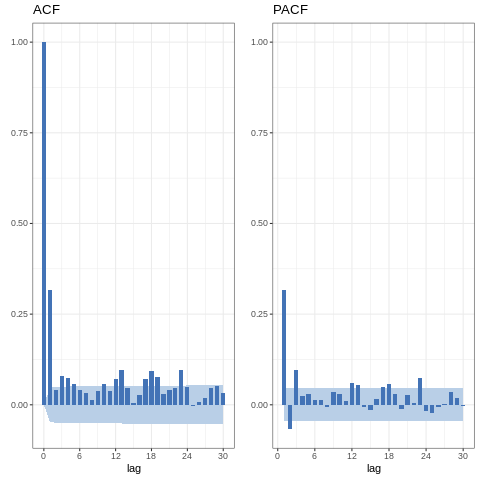

In [ ]:
# Autocorrelation plots
%%R
ggplot.corr(data = Datam, lag.max = 30, ci= 0.95, large.sample.size = TRUE, horizontal = TRUE)

<p align="justify">We can observe there is little correlation between the lagged values, so the data does not depend highly on the history (short memory). This means that the data can be influenced by randomness.

<p align="justify"> Then, we apply unit root tests to data regarding a subsetting of 7 folds (around 261 entries) which may simulate a complete year. This procedure supports identifying unit-roots in the historical data and determining if the data is a stationary stochastic process or it's not (random walk).

In [ ]:
%%R
Datamsubsets<-split(Datam, rep(1:ceiling(261), each=261, length.out=1827)) # Data subsetting

trend <- list() # List to save DF test results
drift <- list() # List to save DF no trend test results
none <- list()  # List to save DF no trend and no drift test results
pp <- list()    # List to save PP test results
URtests<-data.frame(matrix(0, 7, 5)) # Table that summarizes reults in every test

# Rename every column
names(URtests)[1]<-paste("Data subsets")
names(URtests)[2]<-paste("Dickey-Fuller test")
names(URtests)[3]<-paste("Dickey-Fuller test - no trend")
names(URtests)[4]<-paste("Dickey-Fuller test- no trend and no drift")
names(URtests)[5]<-paste("Phillips-Perron test")

# Loop to calculate every test for every range or subset
for (i in 1:7) {

  # Augmented Dickey-Fuller test
  trend[[i]]<-summary(ur.df(ts(Datamsubsets[[i]]), type="trend", selectlags = "AIC"))
  drift[[i]]<-summary(ur.df(ts(Datamsubsets[[i]]), type="drift", selectlags = "AIC"))
  none[[i]]<-summary(ur.df(ts(Datamsubsets[[i]]), type="none", selectlags = "AIC"))
  pp[[i]]<-PP.test(ts(Datamsubsets[[i]]), lshort = "FALSE")

  # Saving P-values
  URtests[i,2]<-round(trend[[i]]@testreg$coefficients[13],4) # p value
  URtests[i,3]<-round(drift[[i]]@testreg$coefficients[10],4) # p value
  URtests[i,4]<-round(none[[i]]@testreg$coefficients[7],4)    # p value
  URtests[i,5]<-round(pp[[i]][["p.value"]],4)                  # p value
  URtests[i,1]<-paste("Range", i, "(",((i-1)*261)+1, "-", i*261, ")")
}
data.frame(URtests)

             Data.subsets Dickey.Fuller.test Dickey.Fuller.test...no.trend
1     Range 1 ( 1 - 261 )             0.2554                             0
2   Range 2 ( 262 - 522 )             0.0000                             0
3   Range 3 ( 523 - 783 )             0.0000                             0
4  Range 4 ( 784 - 1044 )             0.0000                             0
5 Range 5 ( 1045 - 1305 )             0.4522                             0
6 Range 6 ( 1306 - 1566 )             0.0002                             0
7 Range 7 ( 1567 - 1827 )             0.0046                             0
  Dickey.Fuller.test..no.trend.and.no.drift Phillips.Perron.test
1                                         0                 0.01
2                                         0                 0.01
3                                         0                 0.01
4                                         0                 0.01
5                                         0                 0.01
6         

<p align="justify"> Then, we can state that the series is stationary regarding that only two periods subsets have non-stationary behavior. Also, there are several outliers that required to be addressed before fitting an ARIMA model. To do that, this study first develop an outliers imputation procedure and then applies a normalization using the fourth root.


In [ ]:
# To determine above or below which values there are outliers
%%R
Q1<-quantile(ts(Datam), c(0.25))
Q3<-quantile(ts(Datam), c(0.75))
Q3 + 1.5 * (Q3-Q1)

    75% 
13.5125 


<p align="justify"> The following code lines relate to the data transformation to reduce the variance in the data. First, we drop the data that is out of the range established using the third quartile and the Interquartile Range, then we generate the data imputation regarding the 14 closest data (7 ahead data and 7 previous data) covering the data behavior and variation of two weeks.

In [ ]:
# Replacing outliers using an imputation of 7 knn
%%R
Datam[Datam>13.5125]<-NA # replacing outliers with NA
Datam<-na_ma(Datam, k = 7, weighting = "linear") # replacing with mean values

In [ ]:
%%R
Datar<-Datam**(1/4) # Transformed dataserie (Box-Cox Tranformation)

In [ ]:
%%R
l<-c(1:1827)
Datar<-data.frame(l, round(Datar, 7))
names(Datar)[1]<-paste("T")
names(Datar)[2]<-paste("PRECIPITATION")

<p align="justify"> In the following plot we can see that the data variance is under control regarding the series are in the range [0-2] (first plot).

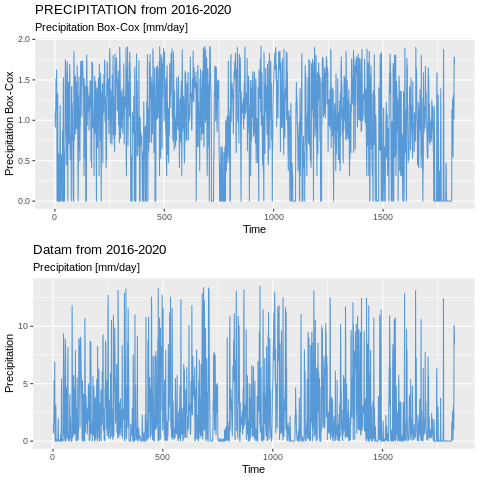

In [ ]:
# Data transformed visualization
%%R
D<-data.frame(Datar)
colums<- c("PRECIPITATION", "Datam")
metricunits<-c("[mm/day]", "[mm/day]")
parameters<- c("Precipitation Box-Cox", "Precipitation")
j<-1
Plt<-list()
for(i in colums){

  Plt[[i]] <- ggplot(D,  aes_string(x="T", y=i)) + geom_line(alpha = 0.7, color ="#1874CD")+
    labs(title=paste(i,"from 2016-2020"),subtitle=paste(parameters[j], metricunits[j]), y=parameters[j], x="Time")
  j<-j+1
}
do.call(grid.arrange, Plt)

Now we can see that the data has a controlled variance which supports a better building of autoregressive models.

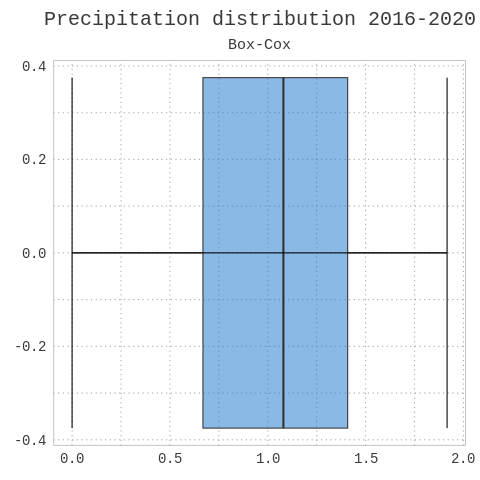

In [ ]:
# Boxplot
%%R
ggplot(Datar, aes(x=PRECIPITATION)) + geom_boxplot(fill="#1874CD", alpha=0.5)+theme_elegante()+
  labs(title="Precipitation distribution 2016-2020", subtitle="Box-Cox")+
  theme(axis.title.x=element_blank(), plot.title=element_text(size=20))+stat_boxplot(geom ='errorbar')

<a name="Fifth"></a>
## **Modeling approach**

### **ARIMA model**

<p align="justify"> Now that the process is stationary, the variance is under control, and outliers are imputed, we proceed to build the ARIMA model.

In [ ]:
### ARIMA model
%%R
AIC<- data.frame(matrix(0, 100, 4)) # Matrix that save Akaike criterion of different models
colnames(AIC)<-c("p", "d","q", "AIC") # Naming columns in the AIC data
order<-matrix(0, 1 ,3) # Matrix to save the order
k<-1

# Double loop for building different ARIMA models regarding every combination possible of p and q parameters
for (i in 0:9) {
  for (j in 0:9) {
    arm<-arima(Datar[,2], order = c(i,0,j), include.mean = FALSE)
    AIC[k,1]<-i
    AIC[k,3]<-j
    AIC[k,4]<-arm$aic # Saving every ARIMA model AIC
    k<-k+1
  }
}

In [ ]:
%%R
ca<-AIC
order<-arrange(ca, ca$AIC) # Sorting AIC values
order

    p d q      AIC
1   6 0 3 1933.254
2   6 0 8 1935.155
3   7 0 1 1937.528
4   8 0 1 1938.102
5   7 0 5 1938.278
6   1 0 8 1938.409
7   7 0 8 1938.446
8   6 0 1 1938.713
9   7 0 2 1938.901
10  8 0 8 1939.042
11  9 0 1 1939.103
12  8 0 3 1939.159
13  6 0 2 1939.218
14  7 0 6 1939.417
15  9 0 3 1939.802
16  2 0 4 1939.833
17  3 0 3 1939.899
18  2 0 7 1940.261
19  1 0 9 1940.378
20  2 0 8 1940.389
21  8 0 7 1940.534
22  5 0 8 1940.583
23  7 0 9 1940.754
24  9 0 2 1941.033
25  8 0 2 1941.365
26  5 0 5 1941.515
27  7 0 7 1941.520
28  1 0 7 1941.759
29  2 0 9 1941.896
30  3 0 9 1942.032
31  4 0 1 1942.316
32  3 0 8 1942.332
33  4 0 2 1942.421
34  6 0 9 1943.468
35  4 0 7 1943.517
36  4 0 3 1943.524
37  5 0 1 1943.660
38  7 0 3 1943.669
39  7 0 4 1943.680
40  1 0 4 1944.015
41  3 0 2 1944.128
42  9 0 9 1944.272
43  5 0 2 1944.362
44  1 0 5 1944.616
45  6 0 4 1944.919
46  4 0 4 1945.008
47  4 0 6 1945.033
48  9 0 8 1945.271
49  9 0 4 1945.315
50  5 0 3 1945.337
51  8 0 5 1946.114
52  2 0 5 19

In [ ]:
# Printing the best ARIMA model according to Akaike criterion
%%R
print(order[1,]) # print best AIC and modelling order

  p d q      AIC
1 6 0 3 1933.254


<p align="justify"> Even obtaining the best ARIMA model according to the AIC, we must check if the residuals are white noise and if the model coefficients are significant. First, we save the best $p$ and $q$ parameters to build the best ARIMA model and then run some plots and statistical tests.

In [ ]:
# Building the best ARIMA model
%%R
modelarm<-arima(Datar[,2], order = c(order[1,1],order[1,2],order[1,3]), include.mean = FALSE)
modelarm


Call:
arima(x = Datar[, 2], order = c(order[1, 1], order[1, 2], order[1, 3]), include.mean = FALSE)

Coefficients:
         ar1      ar2     ar3      ar4     ar5      ar6      ma1     ma2
      2.1743  -2.3710  1.7724  -0.7637  0.3327  -0.1451  -1.6177  1.3778
s.e.  0.1265   0.2429  0.1941   0.0976  0.0579   0.0260   0.1266  0.1780
          ma3
      -0.7143
s.e.   0.0891

sigma^2 estimated as 0.1666:  log likelihood = -956.63,  aic = 1933.25


Now we will check the significance of every parameter of the model  to establish if the model is proper.

In [ ]:
# ARIMA model significance
%%R
coeftest(modelarm) # We can see that four of five parameters has statistical significance


z test of coefficients:

     Estimate Std. Error  z value  Pr(>|z|)    
ar1  2.174289   0.126476  17.1913 < 2.2e-16 ***
ar2 -2.370969   0.242855  -9.7629 < 2.2e-16 ***
ar3  1.772406   0.194135   9.1297 < 2.2e-16 ***
ar4 -0.763678   0.097608  -7.8239 5.120e-15 ***
ar5  0.332688   0.057918   5.7441 9.242e-09 ***
ar6 -0.145132   0.026042  -5.5730 2.503e-08 ***
ma1 -1.617708   0.126605 -12.7776 < 2.2e-16 ***
ma2  1.377786   0.178034   7.7389 1.003e-14 ***
ma3 -0.714308   0.089109  -8.0161 1.091e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



<p align="justify"> We can state, according to coefficients that the $ARIMA(6,0,3)$ is a good alternative to represent data behavior, since every parameter $p$ is almost 0. Also the model residuals are white noise, so we will use this model to build the first scenario fan.


	Ljung-Box test

data:  Residuals
Q* = 2.2604, df = 10, p-value = 0.9939

Model df: 0.   Total lags used: 10



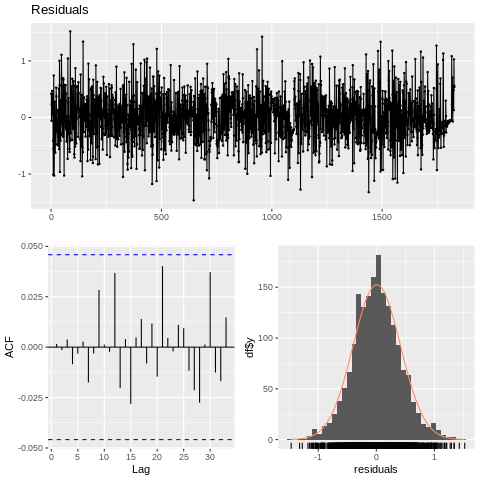

In [ ]:
# Checking ARIMA results
%%R
checkresiduals(modelarm$residuals)

<p align="justify"> Now, we need to determine what kind of residuals we are dealing with, starting from the previous residual analysis we can state we have residuals with normal distribution. Let's validate them.

summary statistics
------
min:  -1.466526   max:  1.52134 
median:  0.006460194 
mean:  0.007849776 
estimated sd:  0.4081564 
estimated skewness:  0.1142221 
estimated kurtosis:  3.466226 


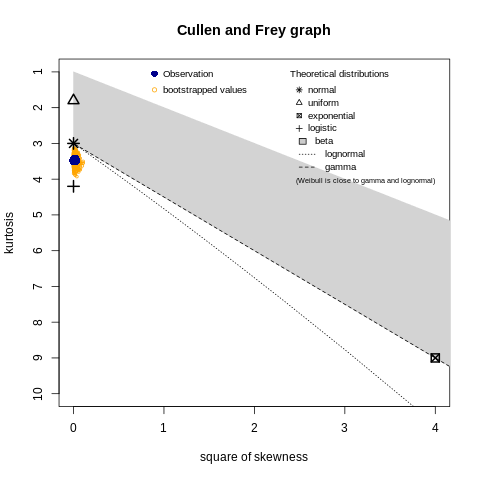

In [ ]:
%%R
# Determining residuals distribution
descdist(as.numeric(modelarm$residuals), boot=1000) # It seems that a normal distribution match the residuals behavior
# We can see that residuals follow a Normal distribution behavior using normality test

In [ ]:
%%R
armpdf<-fitdist(as.numeric(modelarm$residuals), "norm") # We determine the Mean and SD of the residuals
armpdf

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters:
        estimate  Std. Error
mean 0.007849776 0.009546375
sd   0.408044721 0.006750124


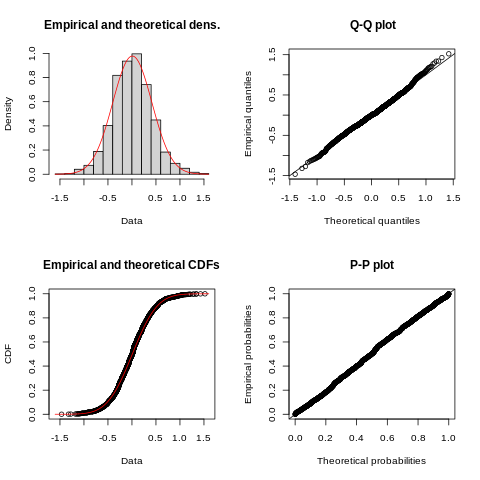

In [ ]:
%%R
plot(armpdf) # Contrasting theorethical and empirical distributions

In [ ]:
%%R
ks.test(modelarm$residuals, "pnorm", 0.007849776, 0.408044721) # Kolmogórov-Smirnov test


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  modelarm$residuals
D = 0.02444, p-value = 0.2252
alternative hypothesis: two-sided



<p align="justify"> Now we after analyzing the theoretical plot against the empirical plot and runing the Kolmogórov-Smirmov, Massey, F. J. (1951).  we can state that the model residuals follow a normal distribution since empirical data plots fit to the theoretical plots and $p$ is higher than $0.05$ in the stastiscal test. Therefore we will use a normal distirbution with $\mu=0.0108344$ and $\sigma=0.4078696$. Now to build the scenario fan we will only use scenarios simulated that have values within an accepted range (0-17.58375) considering that most of the historical series are in this range. Then scenarios simulated over or under this range will be dropped.

In [ ]:
%%R
# Defining the highest accepted value
HIQR<-quantile(ts(Data$PRECIPITATION), c(0.75)) +
      1.5*(quantile(ts(Data$PRECIPITATION), c(0.75))-
             quantile(ts(Data$PRECIPITATION), c(0.25)))
HIQR

     75% 
17.58375 


In [ ]:
%%R
N_simulations<-1001 # The number of simulations to run
SIMU<-matrix(0, 365, N_simulations) # Matrix for storing simulated data
i<-1
while (i<N_simulations) {

SIM<-arima.sim(list(ar = c(2.1743, -2.3710, 1.7724, -0.7637, 0.3327, -0.1451),
              ma = c(-1.6177, 1.3778,  -0.7143)),
              n=365, innov = rnorm(365, 0.007849776, 0.408044721))
if (max(SIM**4)<17.58375) {

    SIMU[,i]<-SIM**4

 }else{
      i<-i-1

  }
  i<-i+1
}

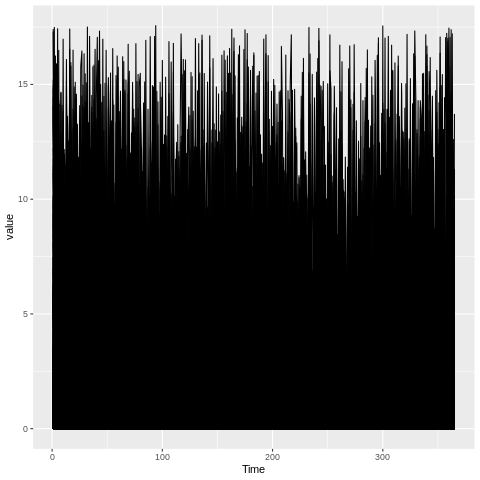

In [ ]:
# Plotting ARIMA scenarios
%%R
Time<-c(1:365) # Setting a timeline
ARMSIM<-data.frame(Time, SIMU[,1:1000])
plt<-melt(ARMSIM, id.vars="Time")

ggplot(data=plt, aes(x=Time, y=value, group=variable)) + geom_line()

In [ ]:
%%R
# Saving ARIMA scenarios
WriteXLS(ARMSIM, "ARMSIM.xlsx")

### **Backpropagtion ANN model**

<p align="justify"> To fit a BP-ANN we will start from the data we transformed and centered previously (the same used in the ARIMA model) ensuring the data it's already helpful and suitable to build the ANN. To fit the ANN model, we must first select the proper number of lags required to support the model building. For that purpose, we will use Partial Autocorrelation Function which allows us to determine how many and what lags are proper to represent the data behavior (replicate the patterns inside the data).

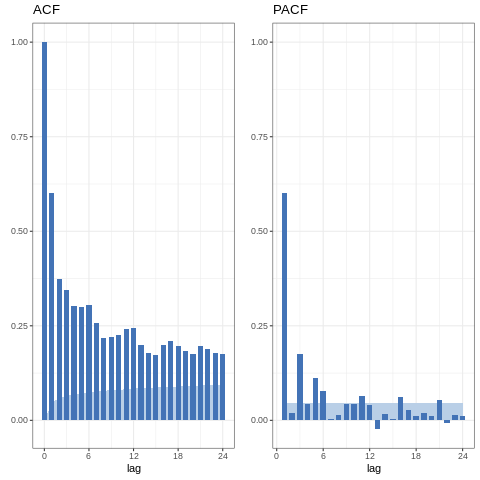

In [ ]:
%%R
Pacf<-ggplot.corr(Datar[,2])
Pacf

<p align="justify"> In the PACF plot, we can see there are around four useful lags, lag 1, 3, 5, and 6, considering they are the main lags that are higher than 0.05. Then, we will build the data structure required to process data and train the model

In [ ]:
%%R
dt<-list()

dt[[1]]<-Datar[1:1827,2] # Sixth lag
dt[[2]]<-Datar[2:1827,2] # Fifth lag
dt[[3]]<-Datar[4:1827,2] # Third lag
dt[[4]]<-Datar[6:1827,2] # First lag
dt[[5]]<-Datar[7:1827,2] # Dependent variable
dt[[6]]<-Datar[1:1827,2] # Original series

In [ ]:
%%R
n<- 1827 # Number of rows
length(dt[[1]])<-n
length(dt[[2]])<-n
length(dt[[3]])<-n
length(dt[[4]])<-n
length(dt[[5]])<-n
length(dt[[6]])<-n

D<-cbind(dt[[6]], dt[[5]], dt[[4]], dt[[3]], dt[[2]], dt[[1]])
Pre<-data.frame(D[1:1827, 2:6]) # Data for training ANN "Pre-Precipitation"

names(Pre)[1]<-paste("Prey") # Renaming the first column
names(Pre)[2]<-paste("X1")
names(Pre)[3]<-paste("X3")
names(Pre)[4]<-paste("X5")
names(Pre)[5]<-paste("X6")

# Now we select the rows concerning only the data for training, which means 1821 rows
Pre<-data.frame(Pre[1:1821,])

<p align="justify"> Then, we neet normalize data into [0-1] range regarding the use of Logistic Sigmoid activation funtion for neurons activation flow, and stablish the data that will support the model building.

In [ ]:
%%R
Serie<-Datar[,2] # Precipitation data (imputed and transformed)
Pren<-data.frame(round(((Pre-min(Serie))/(max(Serie)-min(Serie))), 3)) # Data transformation

trainpre<- data.frame(Pren) # Data for training the ANN model

Finally, the data must follow the next structure, where the dependent variable is first and then the used lags in order:

In [ ]:
%%R
head(trainpre)

   Prey    X1    X3    X5    X6
1 0.659 0.738 0.587 0.477 0.568
2 0.845 0.659 0.791 0.588 0.477
3 0.522 0.845 0.738 0.587 0.588
4 0.000 0.522 0.659 0.791 0.587
5 0.000 0.000 0.845 0.738 0.791
6 0.672 0.000 0.522 0.659 0.738


Then we will start the training process using the follwing parameters.

| hyperparameter | Value/description |
| ----- | --- |
| Formula | $y_{t}$$=$$f(significant$ $lags)$ |
| Data | Precipitation data scaled and transformed|
| Threshold | 0.01|
| Output type| Numeric output|
| Learning rate | 0.005|
| Activation function| Logistic Sigmoide|
| Hidden layers | 2 |
| Hidden neurons | 5 (in each layer) |
| Learning algorithm| Backpropagation |
| Maximum number of steps| 100.000 |


<p align="justify"> Now we will define the formula related to the training stage process:

In [ ]:
%%R
fml<- as.formula(paste("Prey~", paste(names(trainpre[2:length(trainpre)]), collapse = " + ")))

In [ ]:
%%R
# Building the ANN model

preann<-neuralnet(threshold=0.01, fml, trainpre[,1:5], hidden = c(5,5), linear.output = TRUE,
                  learningrate = 0.005, act.fct = "logistic", rep = 1, stepmax = 100000)

In [ ]:
%%R
# Saving the ANN model
save(preann, file = "/content/drive/MyDrive/Colab Notebooks/Parameter modeling/preann.rda")

<p align="justify"> Once we have trained the model, we need to determine the model residuals to identify what kind of PDF they belong to, to proceed to build the scenario fan. We will follow the same process displayed in the ARIMA residuals PDF identification.

summary statistics
------
min:  -0.725189   max:  0.7536323 
median:  0.002511046 
mean:  -4.181425e-06 
estimated sd:  0.2053647 
estimated skewness:  -0.01541525 
estimated kurtosis:  3.518188 


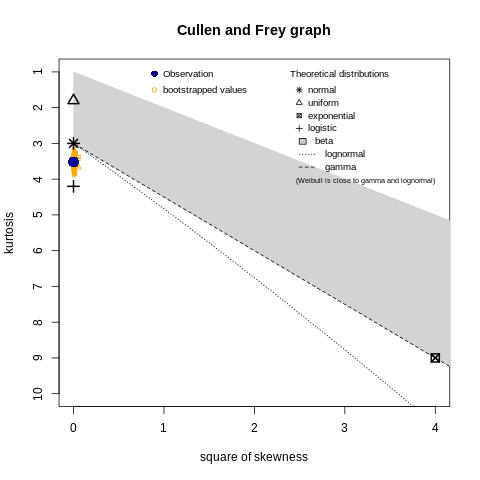

In [ ]:
%%R
errors<-trainpre$Prey-preann$net.result[[1]]  # Obtaining training residuals
errors<-as.numeric(errors)
descdist(errors, boot=1000) # Determining ANN residuals distribution

In [ ]:
%%R
plot(preann)

<p align="justify"> Through the Cullen and Frey (1999) we can state that the BP-ANN residuals likely belong to a Normal Distribution like the ARIMA model.

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters:
          estimate  Std. Error
mean -4.181425e-06 0.004811179
sd    2.053083e-01 0.003401654


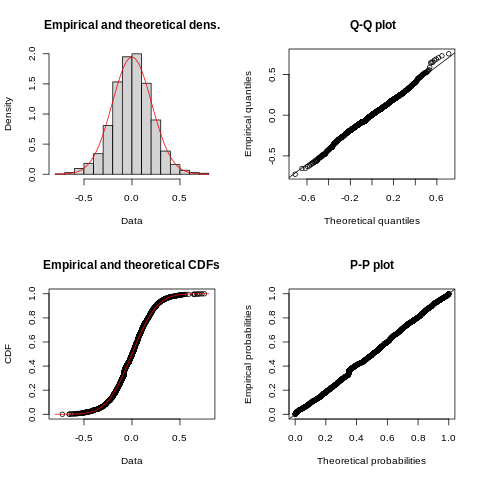

In [ ]:
%%R
annpdf<-fitdist(errors, "norm") # Determining Mean and SD
print(annpdf)
plot(annpdf)

<p align="justify"> Now we apply the Kolmogórov-Smirmov, Massey, F. J. (1951).  and we can state tha residuals follows a Normal Distribution Function.

In [ ]:
%%R
ks.test(errors, "pnorm", -4.181425e-06, 2.053083e-01)


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  errors
D = 0.020497, p-value = 0.4286
alternative hypothesis: two-sided



<p align="justify"> After stablishing the residuals PDf we will produce the scenario fan regarding the same condition (range) we stipulate before (in the ARIMA model) to control the simulations.

In [ ]:
%%R
HIQR

     75% 
17.58375 


<p align="justify"> Now we proceed to build the scenario generation fan regarding the ANN model and the residuals PDF.

In [ ]:
%%R
ANN_simulations<-1001 # Number of scenarios
ANNSIMU<-matrix(0, 365, ANN_simulations) # Database for simulations
ANNSIM<-data.frame(matrix(0, 365, 5))

# Setting the first row of the Simulation data

ANNSIM[1,5]<-Pren[1,4]
ANNSIM[1,4]<-Pren[1,3]
ANNSIM[1,3]<-Pren[1,2]
ANNSIM[1,2]<-Pren[1,1]

# Renaming columns

colnames(ANNSIM)[1]<-paste("Prey")
colnames(ANNSIM)[2]<-paste("X1")
colnames(ANNSIM)[3]<-paste("X3")
colnames(ANNSIM)[4]<-paste("X5")
colnames(ANNSIM)[5]<-paste("X6")

# While loop to fill the dataframe

j<-1
while (j<ANN_simulations) {

  for (i in 1:365) {

    ANNSIM[i,1]<-predict(preann, ANNSIM[i,2:5])+rnorm(1, 9.863511e-07, 2.051986e-01)

    ANNSIM[i+1,5]<-ANNSIM[i,4]
    ANNSIM[i+1,4]<-ANNSIM[i,3]
    ANNSIM[i+1,3]<-ANNSIM[i,2]
    ANNSIM[i+1,2]<-ANNSIM[i,1]

  }

  ANNS<-ANNSIM[,1] # Save
  ANNS<-data.frame(round(ANNS, 3))*(max(Serie)-min(Serie))+min(Serie)

  if (max(ANNS[1:365,1]**4)<17.58375) {

    ANNSIMU[,j]<-ANNS[1:365,1]**4

  }else{
    j<-j-1

  }
  j<-j+1
}

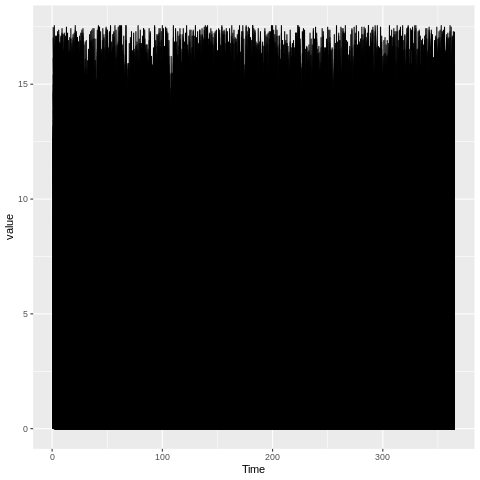

In [ ]:
%%R
# Plotting ANN scenarios

Time<-c(1:365)
ANNSIMU<-data.frame(Time, ANNSIMU[,1:1000])
pltann<-melt(ANNSIMU, id.vars="Time")

ggplot(data=pltann, aes(x=Time, y=value, group=variable)) + geom_line()

In [ ]:
%%R
# Saving ANN scenarios
WriteXLS(ANNSIMU, "ANNSIMU.xlsx")

### **Moment Matching**

<p align="justify"> To determine which PDFs the data belongs to, we must provide a data imputation to replace outliers with data that belongs to a certain range. That range relates the same procedure presented in the data descriptive analysis.

In [ ]:
%%R
mmdata<-Data1[,9] # Data for PDF fitting

In [ ]:
%%R # Determining the upper limit of the range
Q1<-quantile(ts(mmdata), c(0.25))
Q3<-quantile(ts(mmdata), c(0.75))
Q3 + 1.5 * (Q3-Q1)

    75% 
13.5125 


In [ ]:
%%R
mmdata[mmdata>13.5125]<-NA # Replacing outliers with NA
mmdata<-na_ma(mmdata, k = 7, weighting = "linear") # Replacing with mean values

<p align="justify"> Now we use the Cullen and Frey (1999) to determine what kind of PDF the data may belong to.

summary statistics
------
min:  0   max:  13.49 
median:  1.36 
mean:  2.603356 
estimated sd:  3.094494 
estimated skewness:  1.471549 
estimated kurtosis:  4.5415 


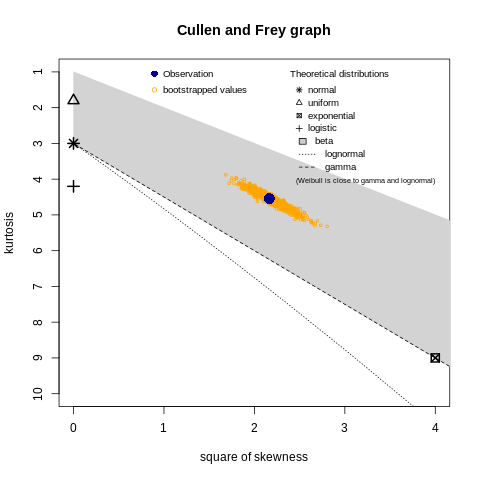

In [ ]:
%%R
descdist(mmdata, boot=1000)

<p align="justify"> In the plot, we can see that data falls in the region of the Beta Probability Distribution Function which represents the best option. To fit a beta distribution we need to rescale the data regarding the [0-1] since that PDF exists in that range.

In [ ]:
%%R
mmData<-(mmdata-min(mmdata))/(max(mmdata)-min(mmdata))

No we analyze if data belongs to a certain beta distribution defining the PDF parameters.

In [ ]:
%%R
fitdist(mmData, "beta", method = "mme")

Fitting of the distribution ' beta ' by matching moments 
Parameters:
        estimate
shape1 0.3785048
shape2 1.5828210


<p align="justify"> We will check if the beta distribution provides a good representation of a kind PDF data can belong to, comparing around 5 different simulations with the moments that the data have.

In [ ]:
%%R
# Real moments of Data
pdfsim<-matrix(0, 4, 6)
pdfsim[1,1]<-mean(mmData)
pdfsim[2,1]<-var(mmData)
pdfsim[3,1]<-skewness(mmData)
pdfsim[4,1]<-kurtosis(mmData)

In [ ]:
%%R
# PDF data simulation comparisons. The first column represents the real moments
for (i in 2:6){
    pdfsim[1, i]<-mean(rbeta(n = 1800, shape1 = 0.3785048, shape2 = 1.5828210))
    pdfsim[2, i]<-var(rbeta(n = 1800, shape1 = 0.3785048, shape2 = 1.5828210))
    pdfsim[3, i]<-skewness(rbeta(n = 1800, shape1 = 0.3785048, shape2 = 1.5828210))
    pdfsim[4, i]<-kurtosis(rbeta(n = 1800, shape1 = 0.3785048, shape2 = 1.5828210))
}
print(data.frame(pdfsim))

          X1         X2         X3         X4         X5         X6
1 0.19298417 0.19226496 0.19540807 0.18686507 0.19607358 0.19098085
2 0.05262054 0.05057239 0.05369974 0.05285751 0.05702673 0.05347557
3 1.47034044 1.30577166 1.42737863 1.37198644 1.39303223 1.42050432
4 4.53400205 4.10927044 4.04339887 3.96678181 4.37500500 4.16802253


<p align="justify"> After the simulations, we can see that the first two moments are quite similar to the real data, and the second and third moments may vary from the real ones, but we can still consider them as good samples of simulations through the distribution. Now we will build the PDF simulation suing these parameters.

In [ ]:
%%R
BETSIM<-matrix(0, 365, 1000) # PDF simulation data
for (j in 1:1000) {
for (i in 1:365) {
  BETSIM[i,j]<-round(rbeta(n = 1, shape1 = 0.3785048, shape2 = 1.5828210), 3)*(max(mmdata)-min(mmdata))+min(mmdata)
}}

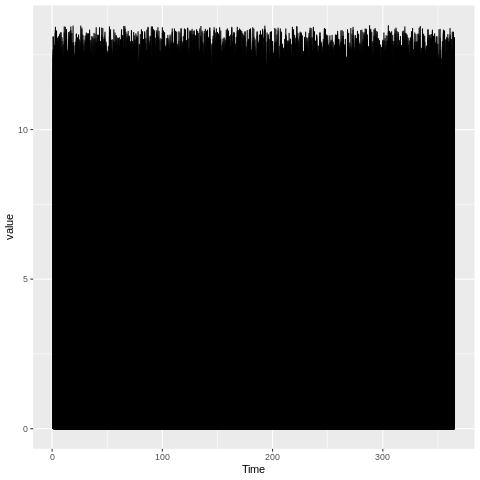

In [ ]:
# Plotting PDF scenarios
%%R
Time<-c(1:365)
BETSIM<-data.frame(Time, BETSIM[,1:1000])
pltbet<-melt(BETSIM, id.vars="Time")

ggplot(data=pltbet, aes(x=Time, y=value, group=variable)) + geom_line()

In [ ]:
%%R
# Saving ANN scenarios
WriteXLS(BETSIM, "BETSIM.xlsx")

<a name="Sixth"></a>
## **Scenario Reduction**

<p align="justify"> No we will provide the scenario reduction of the three databases using the Kantorovich Distance. We will only use 364 days to provide a standard data aggregation (every 14 days) allowing us to reduce the function computation while meeting the decision spam every 14 days.

In [ ]:
%%R
# Data aggregartion of ARIMA scenarios
DATA1=read_excel("/content/ARMSIM.xlsx", sheet = "ARMSIM")
ARMSIM2<-rollapply(DATA1[1:364,2:1001], 14, sum, by=14) # Data aggregation every 14 days
WriteXLS(data.frame(ARMSIM2), "ARMSIM2.xlsx") # Saving data to upload it into Python console

In [ ]:
%%R
# Data aggregartion of ANN scenarios
DATA2=read_excel("/content/ANNSIMU.xlsx", sheet = "ANNSIMU")
ANNSIMU2<-rollapply(DATA2[1:364,2:1001], 14, sum, by=14)
WriteXLS(data.frame(ANNSIMU2), "ANNSIMU2.xlsx")

In [ ]:
%%R
# Data aggregartion of ANN scenarios
DATA3=read_excel("/content/BETSIM.xlsx", sheet = "BETSIM")
BETSIM2<-rollapply(DATA3[1:364,2:1001], 14, sum, by=14)
WriteXLS(data.frame(BETSIM2), "BETSIM2.xlsx")

Now we will upload the aggregated data to determine which scenarios we will use to represent the data behavior in uncertainty conditions.

In [ ]:
# ARIMA
ruta= "/content/ARMSIM2.xlsx"
DATA= pd.read_excel(ruta)

In [ ]:
# ANN
ruta= "/content/ANNSIMU2.xlsx"
DATA= pd.read_excel(ruta)

In [ ]:
# BETA
ruta= "/content/BETSIM2.xlsx"
DATA= pd.read_excel(ruta)

<p align="justify"> We will determine multiple scenarios fans which will have 1, 3, 5, and 10 scenarios, one by every modeling strategy, which means a combination of 12 fans of reduced scenarios.

In [ ]:
# Scenario reduction
def norm_matrix(matrix):
  return matrix.apply(lambda x: (x-x.mean())/ x.std(), axis=1)

red_scen = 1
data_copy = DATA.copy()
norm=norm_matrix(data_copy)
act_scen = norm.dropna(axis=1).shape[1]
p = 1/norm.shape[1]
tol_arr = []
tolrel_arr = []
p_df = pd.DataFrame()
p_df['p'] = [1]*1000

while(act_scen > red_scen):
  # Distance matrix
  aux = np.broadcast_to(norm.values,  (norm.shape[1], *norm.shape))
  dis = np.sqrt(np.square(aux - aux.transpose()).sum(axis=1))

  # Fill diag with NA to not consider them in determining the min value
  np.fill_diagonal(dis, np.nan)

  # Parameters to save every iteration of scenario reduction
  df=pd.DataFrame()
  df["value"]=pd.DataFrame(dis).min(skipna=True)
  df["pair1"]=pd.DataFrame(dis).index.values
  df["pair2"]=pd.DataFrame(dis).idxmin(skipna=True, axis=1)
  df["p"]=p
  df["cost"]=df["value"]*df["p"]
  df["mindist"]=pd.DataFrame(dis).sum(0, min_count=1)

  # Emax
  Emax=pd.DataFrame(dis).sum(0, min_count=1).min(skipna=True)

  # Relative Tolerance
  Tolrel=df["cost"].min(skipna=True)/Emax

  # Parametric Tolerance
  a=1.5     # Custom value
  Tol=0.1     # Custom value
  t=norm.shape[0]
  T=Tol/a**t

  df["Tolrel"]=Tolrel
  df["T"]=T
  tol_arr.append(T)
  tolrel_arr.append(Tolrel)

  # Scenarios Index
  min_cost_row = df.loc[df['cost'].idxmin()]
  scenario_1 = min_cost_row['pair1']
  scenario_2 = min_cost_row['pair2']

  # Emax Index
  min_idx = df["mindist"].idxmin()

  # List with the most similar scenarios
  values = [scenario_1, scenario_2, min_idx]

  # Find the duplicated index to delet it
  repeated_value = statistics.mode(values)

  # Adding Probabilities
  df.at[scenario_1, 'p'] += df.at[df.loc[df['pair1'] == scenario_1, 'pair2'].values[0], 'p']
  df.at[scenario_2, 'p'] = df.at[scenario_1, 'p']

  # Making zero the probability of the min Emax
  df.at[repeated_value, 'p'] = 0
  p = df['p']

  # Turn the deleted scenario in the norm matrix to inf
  norm.iloc[:, int(repeated_value)] = np.nan
  act_scen = norm.dropna(axis=1).shape[1]

  # Loop to meet the tolerance, else delete a row in the real matrix
  if Tolrel >= T:
    norm.drop(norm.tail(1).index,inplace=True)

  if act_scen >= red_scen:
    # Distance matrix
    aux = np.broadcast_to(norm.values,  (norm.shape[1], *norm.shape))
    dis = np.sqrt(np.square(aux - aux.transpose()).sum(axis=1))

    # Seeting NA in the diagonal to nof affect the calculations using zeros
    np.fill_diagonal(dis, np.nan)

    # Parameters table
    df=pd.DataFrame()
    df["value"]=pd.DataFrame(dis).min(skipna=True)
    df["pair1"]=pd.DataFrame(dis).index.values
    df["pair2"]=pd.DataFrame(dis).idxmin(skipna=True, axis=1)
    df["p"]=p # Saves the final scenario with its respective probability
    df["cost"]=df["value"]*df["p"]
    df["mindist"]=pd.DataFrame(dis).sum(0)
    df["Tolrel"]=Tolrel

    df["T"]=T

  to_insert = df['p']
  to_insert.loc[to_insert > 0] = 1
  p_df = pd.concat([p_df, to_insert.astype(int)], axis=1, ignore_index=True)

In [ ]:
p.loc[p>0] # Determining which scenarios remains after the reduction process with its probability

In [ ]:
df = p_df.multiply(p_df.index.values+1, axis=0).T # for builiding an example of scenario reduction plot
df.to_csv("df.csv") # Remaining scenario in every iteration

<a name="Seventh"></a>
## **Evapotranspiration (ETo) Simulation**

<p align="justify"> This section supports the "perfect" simulation of Evapotranspiration that will be used to build the Deterministic and Stochastic models. This process is important since ETo supports the model building and solution according to the water balance equations. For that purpose, this study will determine which kind of distribution ETo data follows using the last five years(2016-2020), generating a path (364 days) from the Expected Value of 1000 simulations corresponding to an entire year.

In [ ]:
# Loading ETo Dataset
%%R
ETo<-as.matrix(read_excel("/content/drive/MyDrive/Materias Maestria/Project/Sections/3. Assumptions and models/Evapotranspiration.xlsx", sheet = "Data"))

summary statistics
------
min:  1.511886   max:  5.086982 
median:  3.626574 
mean:  3.59624 
estimated sd:  0.543244 
estimated skewness:  -0.3167026 
estimated kurtosis:  3.136955 


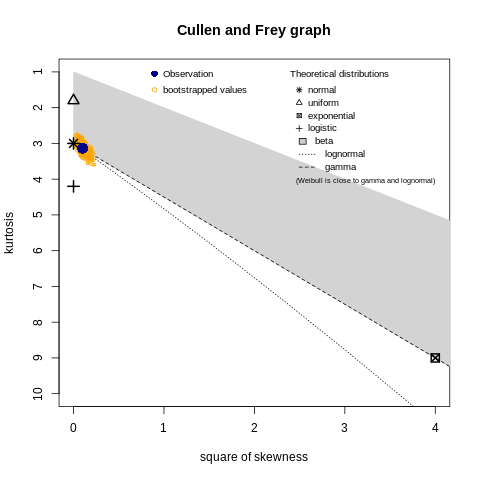

In [ ]:
# Determining the best PDF according to skewness and kurtosis
%%R
descdist(ETo[,1], boot=1000)

<p align="justify"> We can see in the plot above that according to the skewness and kurtosis the best option to represent the data follows a normal distribution, so we determine the first two moments of the data and we apply the Kolmogórov-Smirnov test to check such assumption.

In [ ]:
%%R
fitdist(ETo[,1], "norm", method = "mme")

Fitting of the distribution ' norm ' by matching moments 
Parameters:
      estimate
mean 3.5962403
sd   0.5430954


In [ ]:
%%R
ks.test(ETo, "pnorm", 3.5962403, 0.5430954) # Kolmogórov-Smirnov test


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  ETo[, 1]
D = 0.030858, p-value = 0.06165
alternative hypothesis: two-sided



<p align="justify"> Now we develop and save 1000 simulations to support the parameter definition in the model through the average of the simulations fan.

In [ ]:
%%R
ETOsim<-matrix(0, 364, 1000) # PDF simulation data
for (j in 1:1000) {
for (i in 1:364) {
  ETOsim[i,j]<-round(rnorm(n = 1, 3.5962403, 0.5430954), 3)
}}

In [ ]:
%%R
# Saving ETo simulations
WriteXLS(data.frame(ETOsim), "ETO.xlsx")

## **References**

1. Box, G. E. P., & Jenkins, G. M. (1976). Time series analysis: Forecasting and control. San Francisco: Holden-Day
2. Conejo, A. J., Carrión, M., & Morales, J. M. (2010). Decision Making Under Uncertainty in Electricity Markets (Vol. 153). Springer US. https://doi.org/10.1007/978-1-4419-7421-1
3. Cullen, A. and Frey, H. (1999). Probabilistic Techniques in Exposure Assessment. Plenum Publishing Co., 1st edition.
4. Dickey, D. A., & Fuller, W. A. (1979). Distribution of the Estimators for Autoregressive Time Series With a Unit Root. Journal of the American Statistical Association, 74(366), 427–431. https://doi.org/10.2307/2286348
5. Dupačová, J., Gröwe-Kuska, N., & Römish, W. (2003). Scenario reduction in stochastic programming: An approach using probabolity metrics. Mathematical Programming, 95(3), 493–511. https://doi.org/10.1007/s10107-002-0331-0
6. Dupačová, J., & Kozmík, V. (2017). SDDP for multi-stage stochastic programs: preprocessing via scenario reduction. Computational Management Science, 14(1), 67–80. https://doi.org/10.1007/s10287-016-0261-6
7. Gujarati, D. N., & Porter, D. C. (2010). Econometria. In McGraw-Hill.
8. Høyland, K., & Wallace, S. W. (2001). Generating Scenario Trees for Multistage Decision Problems. Management Science, 47(2), 295–307. https://doi.org/10.1287/mnsc.47.2.295.9834
9. Ljung, G., & Box, G. (1978). On a Measure of Lack of Fit in Time Series Models. Biometrika, 65. https://doi.org/10.1093/biomet/65.2.297
10. Massey, F. J. (1951). The Kolmogorov-Smirnov Test for Goodness of Fit. Journal of the American Statistical Association, 46(253), 68–78. https://doi.org/10.2307/2280095
11. Phillips, P., & Perron, P. (1986). Testing for a Unit Root in Time Series Regression. Cowles Foundation, Yale University, Cowles Foundation Discussion Papers, 75. https://doi.org/10.1093/biomet/75.2.335
12. Svozil, D., Kvasnicka, V., & Pospichal, J. (1997). Introduction to multi-layer feed-forward neural networks. Chemometrics and Intelligent Laboratory Systems, 39(1), 43–62. https://doi.org/https://doi.org/10.1016/S0169-7439(97)00061-0
13. Xu, D., Chen, Z., & Yang, L. (2012). Scenario tree generation approaches using K-means and LP moment matching methods. Journal of Computational and Applied Mathematics, 236(17), 4561–4579. https://doi.org/10.1016/j.cam.2012.05.020
14. Yasrebi, S. S., & Emami, M. (2008). Application of Artificial Neural Networks (ANNs) in prediction and Interpretation of Pressuremeter Test Results. Retrieved from https://pdfs.semanticscholar.org/6365/182f2a94dcfd05f99dd11a7740b50a2e852c.pdf
15. Zhang, G. P. (2003). Time series forecasting using a hybrid ARIMA and neural network model. In Neurocomputing (Vol. 50). www.elsevier.com/locate/neucom





